In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import utills
%matplotlib inline


In [52]:
np.random.seed(0)

m = 1_000
split_train = int(m * 0.7)
split_val = int(m * 0.15 + split_train)
split_test = int(m * 0.15 + split_val)
X, y = datasets.make_moons(
    n_samples=m, 
    noise=0.1, 
    random_state=0
)
X_train, y_train = X[:split_train], y[:split_train]
X_val, y_val = X[split_train:split_val], y[split_train:split_val]
X_test, y_test = X[split_val:split_test], y[split_val:split_test]

[[ 2.04271531  0.51812416]
 [ 1.72033708 -0.13233804]
 [-0.26386729  0.76382643]
 ...
 [ 0.17496169  0.8909234 ]
 [ 1.94363339  0.01087462]
 [ 0.51772206  0.75260229]]


In [3]:
print('Splits:', split_train, split_val, split_test)
print('Lenghths:', len(X_train), len(X_val), len(X_test))

Splits: 700 850 1000
Lenghths: 700 150 150


((1000,), (1000, 2))

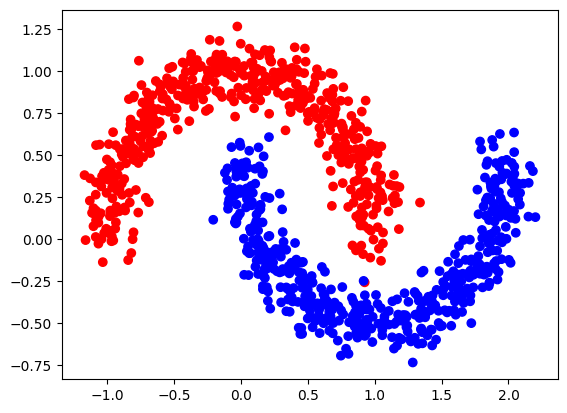

In [4]:
colors = ['blue' if label == 1 else 'red' for label in y]
plt.scatter(X[:,0], X[:,1], color=colors)
y.shape, X.shape

In [5]:
X_train[0], y_train[0]

(array([2.04271531, 0.51812416]), 1)

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

In [7]:
#tf.get_logger().setLevel('ERROR')

In [8]:
model = models.Sequential([
    layers.Flatten(input_shape=(2,)),
    layers.Dense(8, activation='sigmoid'),
    layers.Dense(10, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

In [9]:
model.compile(
    optimizer=optimizers.SGD(learning_rate=0.001), 
    loss=losses.BinaryCrossentropy(),
    metrics=[metrics.BinaryAccuracy()]
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 8)                 24        
                                                                 
 dense_1 (Dense)             (None, 10)                90        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________


In [11]:
epochs = 1_000

In [12]:
with utills.Timer():
    history = model.fit(
        X_train, 
        y_train, 
        verbose=0, 
        epochs=epochs, 
        shuffle=True
    )

** 17.76 seconds.


In [13]:
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 697us/step - loss: 0.6342 - binary_accuracy: 0.8386


[0.6341685056686401, 0.8385714292526245]

In [14]:
model.evaluate(X_val, y_val)

5/5 [==============================] - 0s 1ms/step - loss: 0.6356 - binary_accuracy: 0.8400


[0.6356368660926819, 0.8399999737739563]

32/32 [==============================] - 0s 256us/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

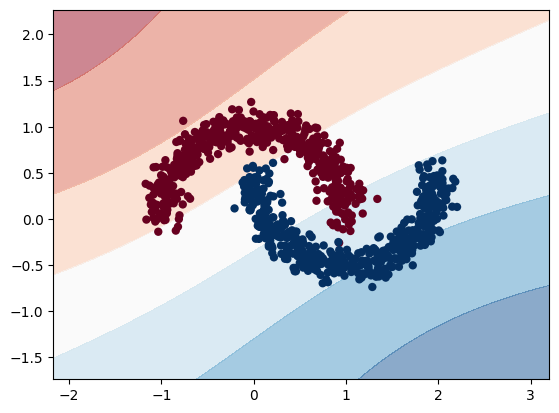

In [15]:
utills.plot_decision_boundary(X, y, model, cmap='RdBu')

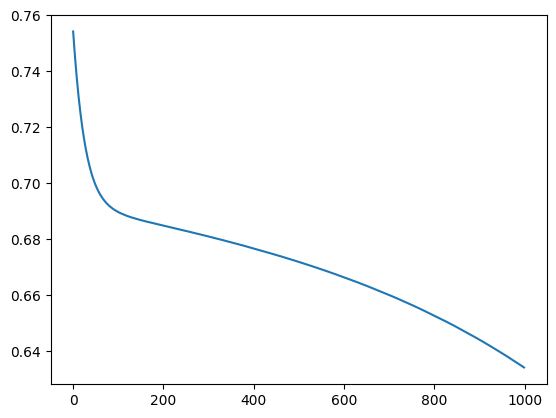

In [16]:
plt.plot([i for i in range(epochs)], history.history['loss'])

In [17]:
epochs = 3_000

In [18]:
with utills.Timer():
    history = model.fit(
        X_train, 
        y_train, 
        verbose=0, 
        epochs=epochs, 
        shuffle=True
    )

** 51.74 seconds.


In [19]:
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 790us/step - loss: 0.2958 - binary_accuracy: 0.8586


[0.295769065618515, 0.8585714101791382]

In [20]:
model.evaluate(X_val, y_val)

5/5 [==============================] - 0s 2ms/step - loss: 0.3075 - binary_accuracy: 0.8667


[0.30746471881866455, 0.8666666746139526]

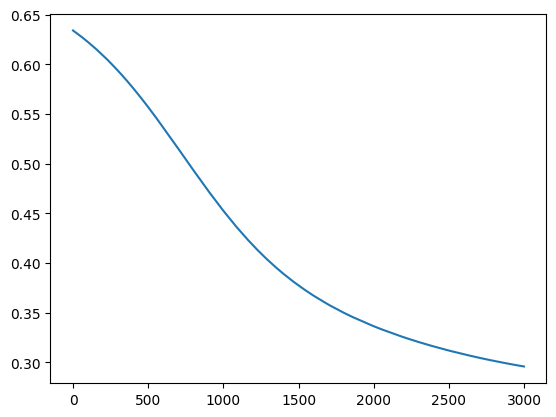

In [21]:
plt.plot([i for i in range(epochs)], history.history['loss'])

32/32 [==============================] - 0s 566us/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

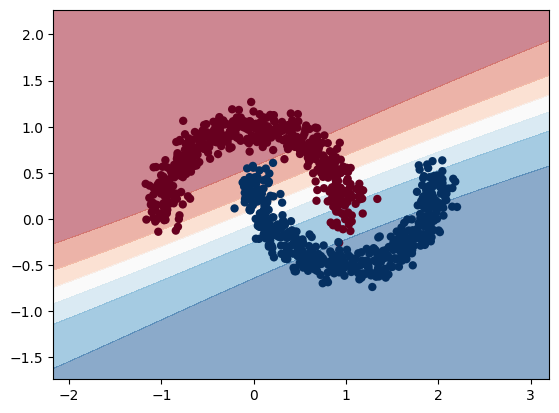

In [22]:
utills.plot_decision_boundary(X, y, model, cmap='RdBu')

In [23]:
del model
del history

In [24]:
model = models.Sequential([
    layers.Flatten(input_shape=(2,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [25]:
epochs = 1_000

In [26]:
model.compile(
    optimizer=optimizers.SGD(learning_rate=0.001), 
    loss=losses.BinaryCrossentropy(),
    metrics=[metrics.BinaryAccuracy()]
)

In [27]:
with utills.Timer():
    history = model.fit(
        X_train, 
        y_train, 
        verbose=0, 
        epochs=epochs, 
        shuffle=True
    )

** 18.69 seconds.


In [28]:
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 656us/step - loss: 0.2552 - binary_accuracy: 0.8743


[0.25522369146347046, 0.8742856979370117]

In [29]:
model.evaluate(X_val, y_val)

5/5 [==============================] - 0s 0s/step - loss: 0.2671 - binary_accuracy: 0.8667


[0.2671054005622864, 0.8666666746139526]

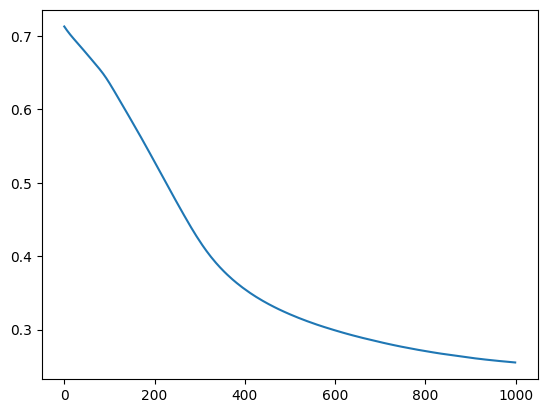

In [30]:
plt.plot([i for i in range(epochs)], history.history['loss'])

In [31]:
del model
del history

In [32]:
model = models.Sequential([
    layers.Flatten(input_shape=(2,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [33]:
epochs = 1_000

In [34]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001), 
    loss=losses.BinaryCrossentropy(),
    metrics=[metrics.BinaryAccuracy()]
)

In [35]:
with utills.Timer():
    history = model.fit(
        X_train, 
        y_train, 
        verbose=0, 
        epochs=epochs, 
        shuffle=True
    )

** 17.39 seconds.


In [36]:
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 790us/step - loss: 0.0024 - binary_accuracy: 0.9986


[0.0023646445479243994, 0.9985714554786682]

In [37]:
model.evaluate(X_val, y_val)

5/5 [==============================] - 0s 2ms/step - loss: 1.7026e-04 - binary_accuracy: 1.0000


[0.00017026443674694747, 1.0]

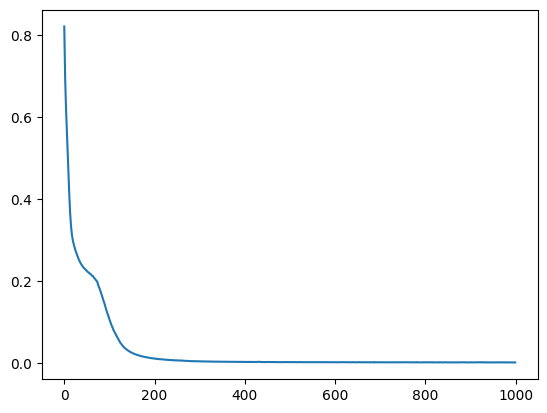

In [38]:
plt.plot([i for i in range(epochs)], history.history['loss'])

32/32 [==============================] - 0s 581us/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

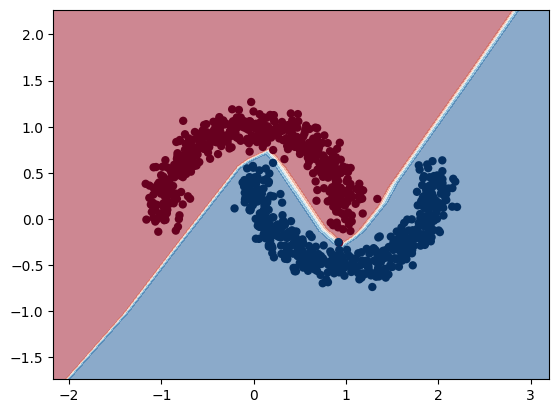

In [39]:
utills.plot_decision_boundary(X, y, model, cmap='RdBu')

In [40]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 1.3509e-04 - binary_accuracy: 1.0000


[0.00013508643314708024, 1.0]

5/5 [==============================] - 0s 0s/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

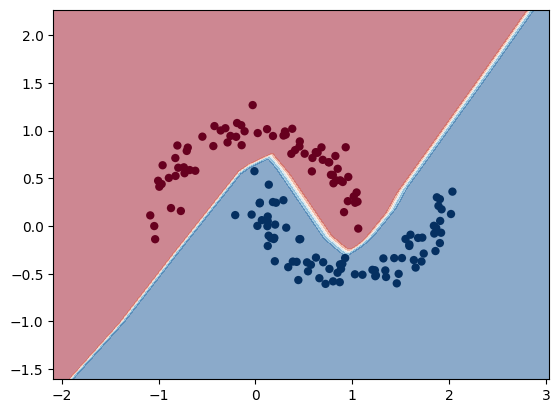

In [41]:
utills.plot_decision_boundary(X_test, y_test, model, cmap='RdBu')

In [44]:
import sklearn.cluster as cluster

def analyze(model, X):
    h = model[1].fit_predict(X)
    clusters = np.unique(h)
    for cluster in clusters:
        idx = np.where(h == cluster)
        plt.scatter(X[idx, 0], X[idx, 1])
        plt.title(model[0])
    plt.show()

[[ 1.24307886e+00 -5.16115038e-01]
 [-9.57761827e-01  6.37181000e-01]
 [-3.92668601e-02  1.19959959e-01]
 [ 1.19849380e-01  1.01547994e+00]
 [ 6.94516536e-01  6.94006790e-01]
 [ 8.70329283e-01 -5.88529558e-01]
 [ 1.89084110e-01 -1.36127351e-01]
 [ 7.61457956e-01  6.67502958e-01]
 [ 7.63596061e-01 -4.49607238e-01]
 [ 1.36196881e-01 -1.01213707e-01]
 [ 8.74946147e-01  4.78918254e-01]
 [-7.38580475e-01  6.15449958e-01]
 [ 7.54084079e-01  6.68570074e-01]
 [ 6.24747363e-01 -3.30892356e-01]
 [ 1.05340149e+00  2.55687409e-01]
 [ 1.72194527e+00 -1.21735833e-01]
 [ 4.39004312e-02  2.37694003e-01]
 [-6.98142166e-01  8.22005148e-01]
 [-1.01710946e-02  5.74922292e-01]
 [-8.05442375e-01  8.44154702e-01]
 [ 4.54400953e-01  8.33573642e-01]
 [-6.20513709e-01  5.79410834e-01]
 [ 1.23261349e-01 -1.43270015e-03]
 [ 1.59140279e-01 -1.25674850e-01]
 [-7.31294302e-01  5.53551910e-01]
 [ 1.51189297e+00 -3.35646742e-01]
 [ 1.32025287e+00 -3.39256985e-01]
 [-3.09976140e-01  1.02526648e+00]
 [ 5.32133612e-01 -3

c:\Users\Andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


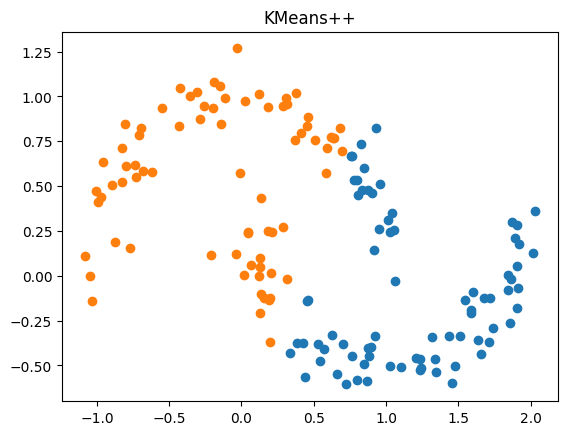

In [47]:
model = 'KMeans++', cluster.KMeans(init="k-means++", n_clusters=2)
# print(X_test)
analyze(model, X_test)

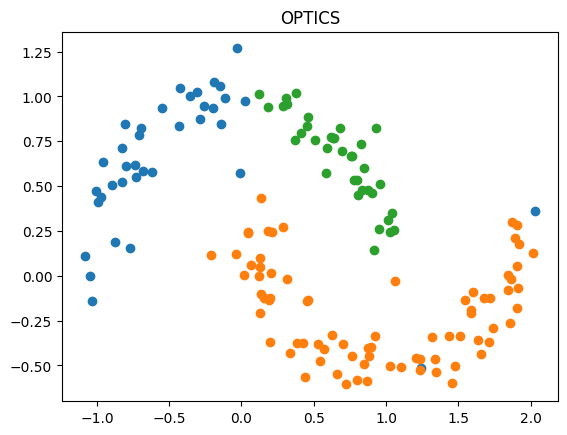

In [46]:
model = 'OPTICS', cluster.OPTICS(min_samples=20)
analyze(model, X_test)